<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-SinFondo.png" style="width:500px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Examen III</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Laboratorio de procesamiento de datos</center></b></font>
<br>
<!-- <br> -->


<b><font face = "Times New Roman" size = "4"><center> </center></font>
<!-- <font face = "Times New Roman" size = "4"><center>Subtema c: x</center></font></b> -->
<div align="right"><font face = "Times New Roman" size = "2">Ubaldo Neri</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Eduardo Martínez</font></div>
<div align="right"><font face = "Times New Roman" size = "2">Demien Becerra</font></div>
</span></div>

### Instrucciones

A continuación los pasos a realizar. Lee con atención  y responde en tu notebook lo que se pide: 

1. Tomar el dataset dado.
2. Hacer un análisis descriptivo y agrupado de los datos. De este punto se espera que el alumno identifique las carencias de la base (información faltante y/o mal presentada) así como el potencial de las variables predictoras hacia la variable de respuesta (`client_stayed`).
    - Este punto trata de analizar el estado en el cual se recibe el conjunto de datos **y explicarlo de manera somera pero con gráficos/tablas que soporten conclusiones preliminares**.
        - Nota: Solamente nombrar columnas o decir que hay X números NO es un análisis descriptivo EDA.
    - Hacer análisis cruzados: Análisis entre varias variables y no solo de manera individual. **Se espera que hagas estos análisis y expliques qué se hace y qué observas en cada uno**.
3. Preprocesar los datos.
    - Se espera que se limpien y/o estandaricen según sea necesario en este punto del proceso.
    - Rellenar información faltante.
      - Explicar el porqué del método elegido.
      - Evaluar los impactos en el conjunto de datos del método elegido. Responder:
          - ¿La variable después de rellenar cambió su distribución de alguna forma?
          - ¿Cambiaron estadísticos como el promedio y la desviación estándar de la variable?
          - ¿Cambió la correlación de la variable con la variable objetivo?
    - Generar un proceso de feature engineering.
        - Crear nuevas variables a partir de las existentes Se deben de crear al menos 5 variables y agregarlas al DataFrame para poder hacer los análisis subsecuentes. Para cada variable creada responder: 
            - ¿Cuál es tu hipótesis? ¿Por qué esa variable puede servir?
            - Después de observar el potencial de la variable explica su comportamiento. ¿Qué observas de tu variable al ser comparada con la variable de respuesta?
        - **Se debe de cuidar que no haya leakage en ninguna de las variables producidas**.
    - Generar un proceso de selección de variables.
        - Se debe de escoger entre al menos una de las siguientes opciones:
            - Varianza.
            - Correlaciones.
            - Coeficientes de una regresión logística.
        - Responder:
            - ¿Cómo se implementó el método utilizado? 
            - ¿Por qué se escogió este método?
            - ¿Qué variables se van a seleccionar con el método?
            - ¿**Cómo puedo demostrar** que las variables elegidas son mejores que las no elegidas?
            - ¿Algunas de las variables generadas con el punto b quedaron elegidas? ¿Por qué?


### Variables

A continuación se adjunta una descripción breve de las variables y de su contenido.

1. `Clientnum`: Id único para el cliente.

2. `Client_stayed`: **Variable de respuesta**. Es 1 si el cliente sigue con el banco o 0 si el cliente decidió dejar de ser cliente.

3. `Customer_age`: Edad del cliente medida en años.

4. `Gender`: Género del cliente. `M` para hombres y `F` para mujeres.

5. `Dependent_count`: Número de dependientes económicos del cliente.

6. `Education_level`: Escolaridad del cliente.

7. `Marital_status`: Estado civil del cliente.

8. `Income_category`: El banco no cuenta con los salarios exactos de los clientes, por lo que esta variable representa un aproximado medio del salario del mismo medido en dólares estadounidenses.

9. `Card_category`: Tipo de instrumento de crédito que tiene el cliente.

10. `Months_on_book`: Periodo en el que el cliente ha estado activo (desde la activación de su instrumento de crédito).

11. `Total_relationship_count`: Número de productos del banco que tiene el cliente. El cliente no está limitado a solo tener su instrumento de crédito, puede tener relación con otras áreas del banco.

12. `Months_inactive_12_mon`: Número de meses que el cliente ha dejado de utilizar su instrumento de crédito en los últimos 12 meses.

13. `Contacts_count_12_mon`: Número de contactos telefónicos que ha hecho el cliente al banco en los últimos 12 meses.

14. `Credit_limit`: Límite del instrumento crediticio medido en dólares estadounidenses.

15. `Total_revolving_bal`: Balance total del instrumento crediticio (cantidad a pagar por el cliente).

16. `Total_trans_amt`: Dinero transaccionado a través del instrumento crediticio en los últimos 12 meses.

17. `Total_trans_ct`: Número de transacciones realizadas a través del instrumento crediticio en los últimos 12 meses.



### Imports

In [1]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Estilo/toutl.mplstyle')
from style import *

In [2]:
df=pd.read_csv('Datos/examen3.csv')

### Datos


In [3]:
display(df.head())
df.info()

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [4]:
df.nunique()

clientnum                   10127
client_stayed                   2
customer_age                   45
gender                          2
dependent_count                 6
education_level                 7
marital_status                  4
income_category                 6
card_category                   4
months_on_book                 44
total_relationship_count        6
months_inactive_12_mon          7
contacts_count_12_mon           7
credit_limit                 6205
total_revolving_bal          1974
total_trans_amt              5033
total_trans_ct                126
dtype: int64

In [5]:
# clientum parece ser el ID del cliente, entonces lo dropeamos
if "clientnum" in df.columns:
    df = df.drop(["clientnum"], axis=1)

In [6]:
display(df.describe(include='O'))
df.describe()

,gender,education_level,marital_status,income_category,card_category
count,10127,10127,10127,10127,10127
unique,2,7,4,6,4
top,F,Graduate,Married,1666.6666666666667,Blue
freq,5358,3128,4687,3561,9436


,client_stayed,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,4404.086304,64.858695
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,3397.129254,23.472570
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,510.000000,10.000000
25%,1.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,2155.500000,45.000000
50%,1.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3899.000000,67.000000
75%,1.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,4741.000000,81.000000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,18484.000000,139.000000


In [10]:
granularidad = df.nunique()
granularidad

client_stayed                  2
customer_age                  45
gender                         2
dependent_count                6
education_level                7
marital_status                 4
income_category                6
card_category                  4
months_on_book                44
total_relationship_count       6
months_inactive_12_mon         7
contacts_count_12_mon          7
credit_limit                6205
total_revolving_bal         1974
total_trans_amt             5033
total_trans_ct               126
dtype: int64

In [13]:
cols_baja = [col for col in df.columns if granularidad[col] < 10]  # Variables categóricas o numéricas discretas
cols_alta = [col for col in df.columns if granularidad[col] > 10] # Variables continuas
 
granularidad_baja = df[cols_baja]
granularidad_alta = df[['client_stayed'] + cols_alta]

display(granularidad_alta.head())
display(granularidad_baja.head())

,client_stayed,customer_age,months_on_book,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,1,45,39,12691.0,777,1144,42
1,1,49,44,8256.0,864,1291,33
2,1,51,36,3418.0,0,1887,20
3,1,40,34,3313.0,2517,1171,20
4,1,40,21,4716.0,0,816,28


,client_stayed,gender,dependent_count,education_level,marital_status,income_category,card_category,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon
0,1,M,3,High School,Married,5833.333333333333,Blue,5,1,3
1,1,F,5,Graduate,Single,1666.6666666666667,Blue,6,1,2
2,1,M,3,Graduate,Married,8333.333333333334,Blue,4,1,0
3,1,F,4,High School,Unknown,1666.6666666666667,Blue,3,4,1
4,1,M,3,Uneducated,Married,5833.333333333333,Blue,5,1,0


### Distribuciones

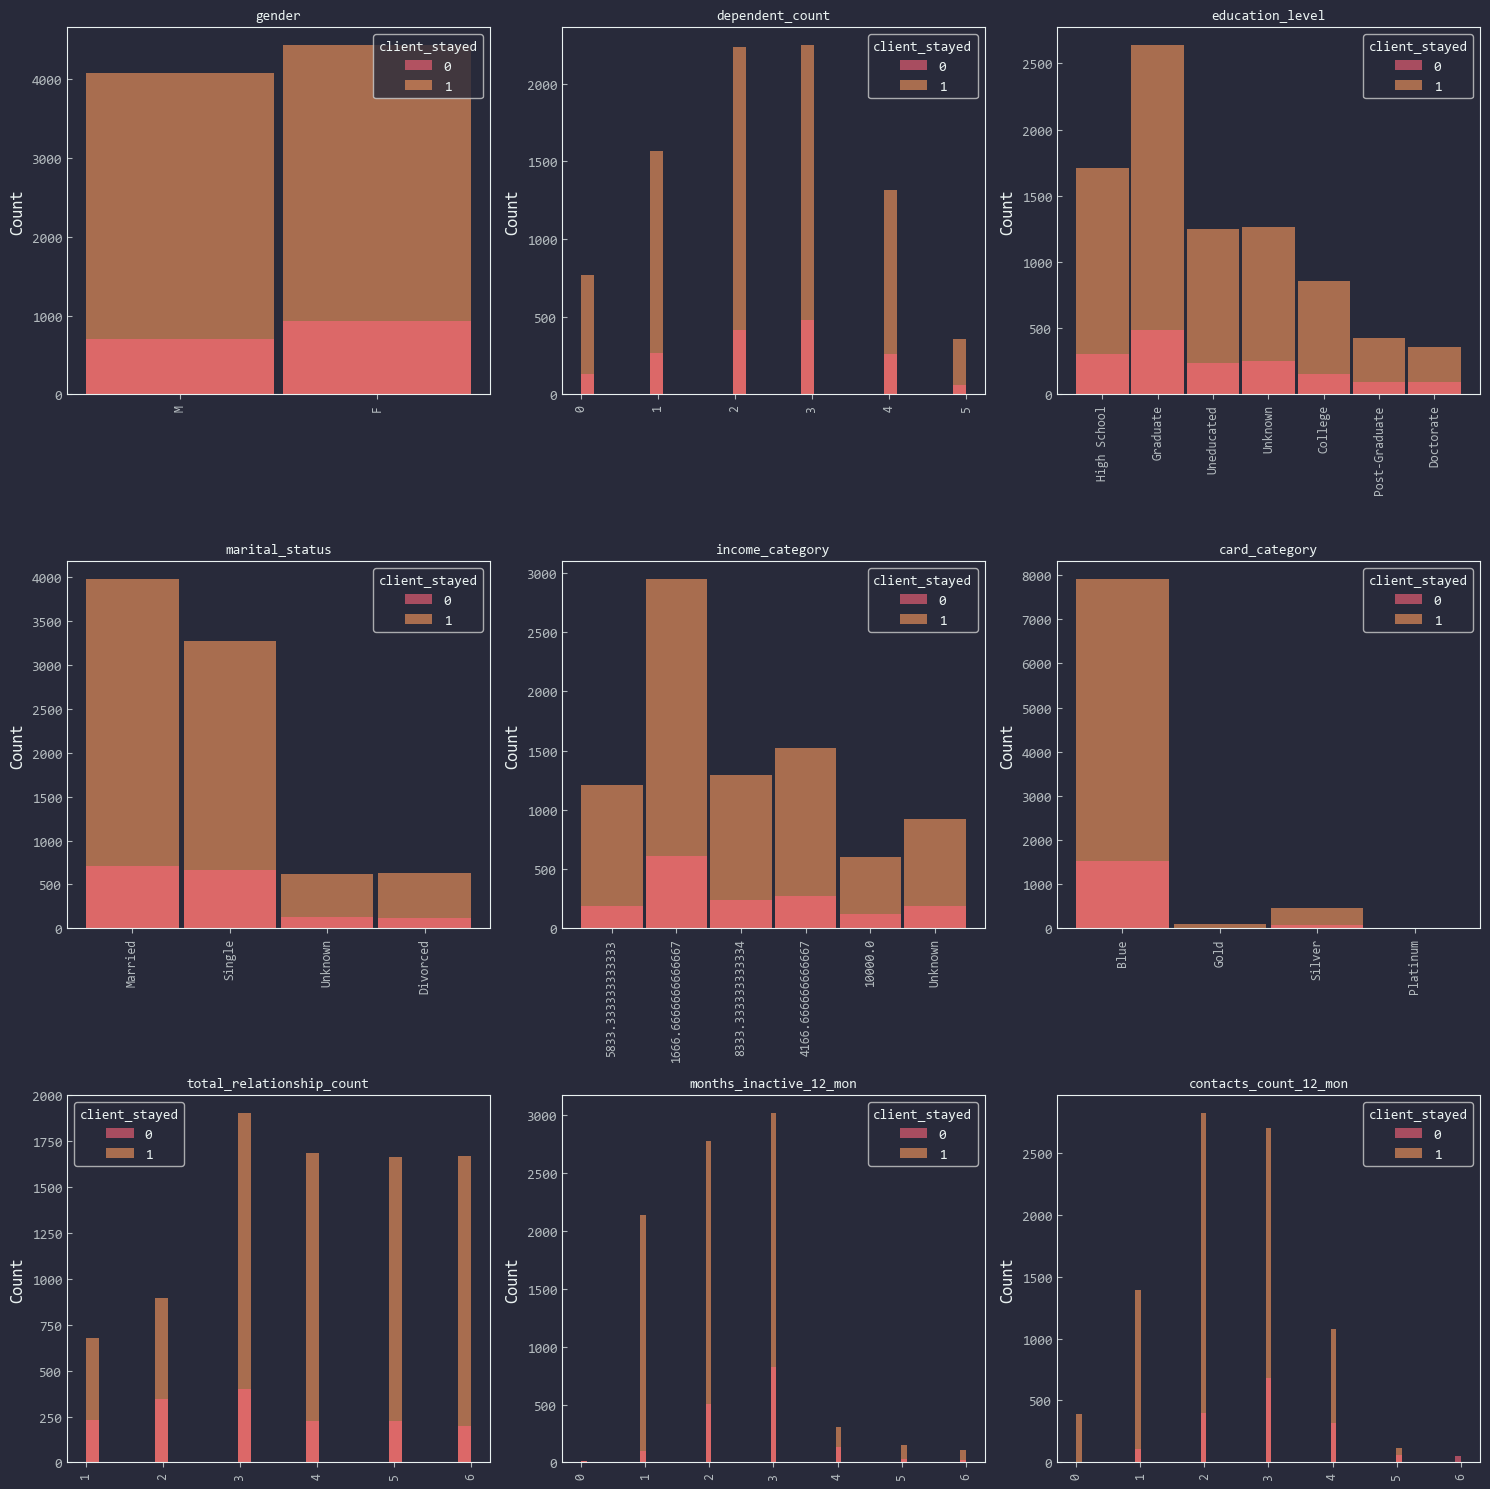

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ax, column in zip(axes.flat, granularidad_baja.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.95)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()

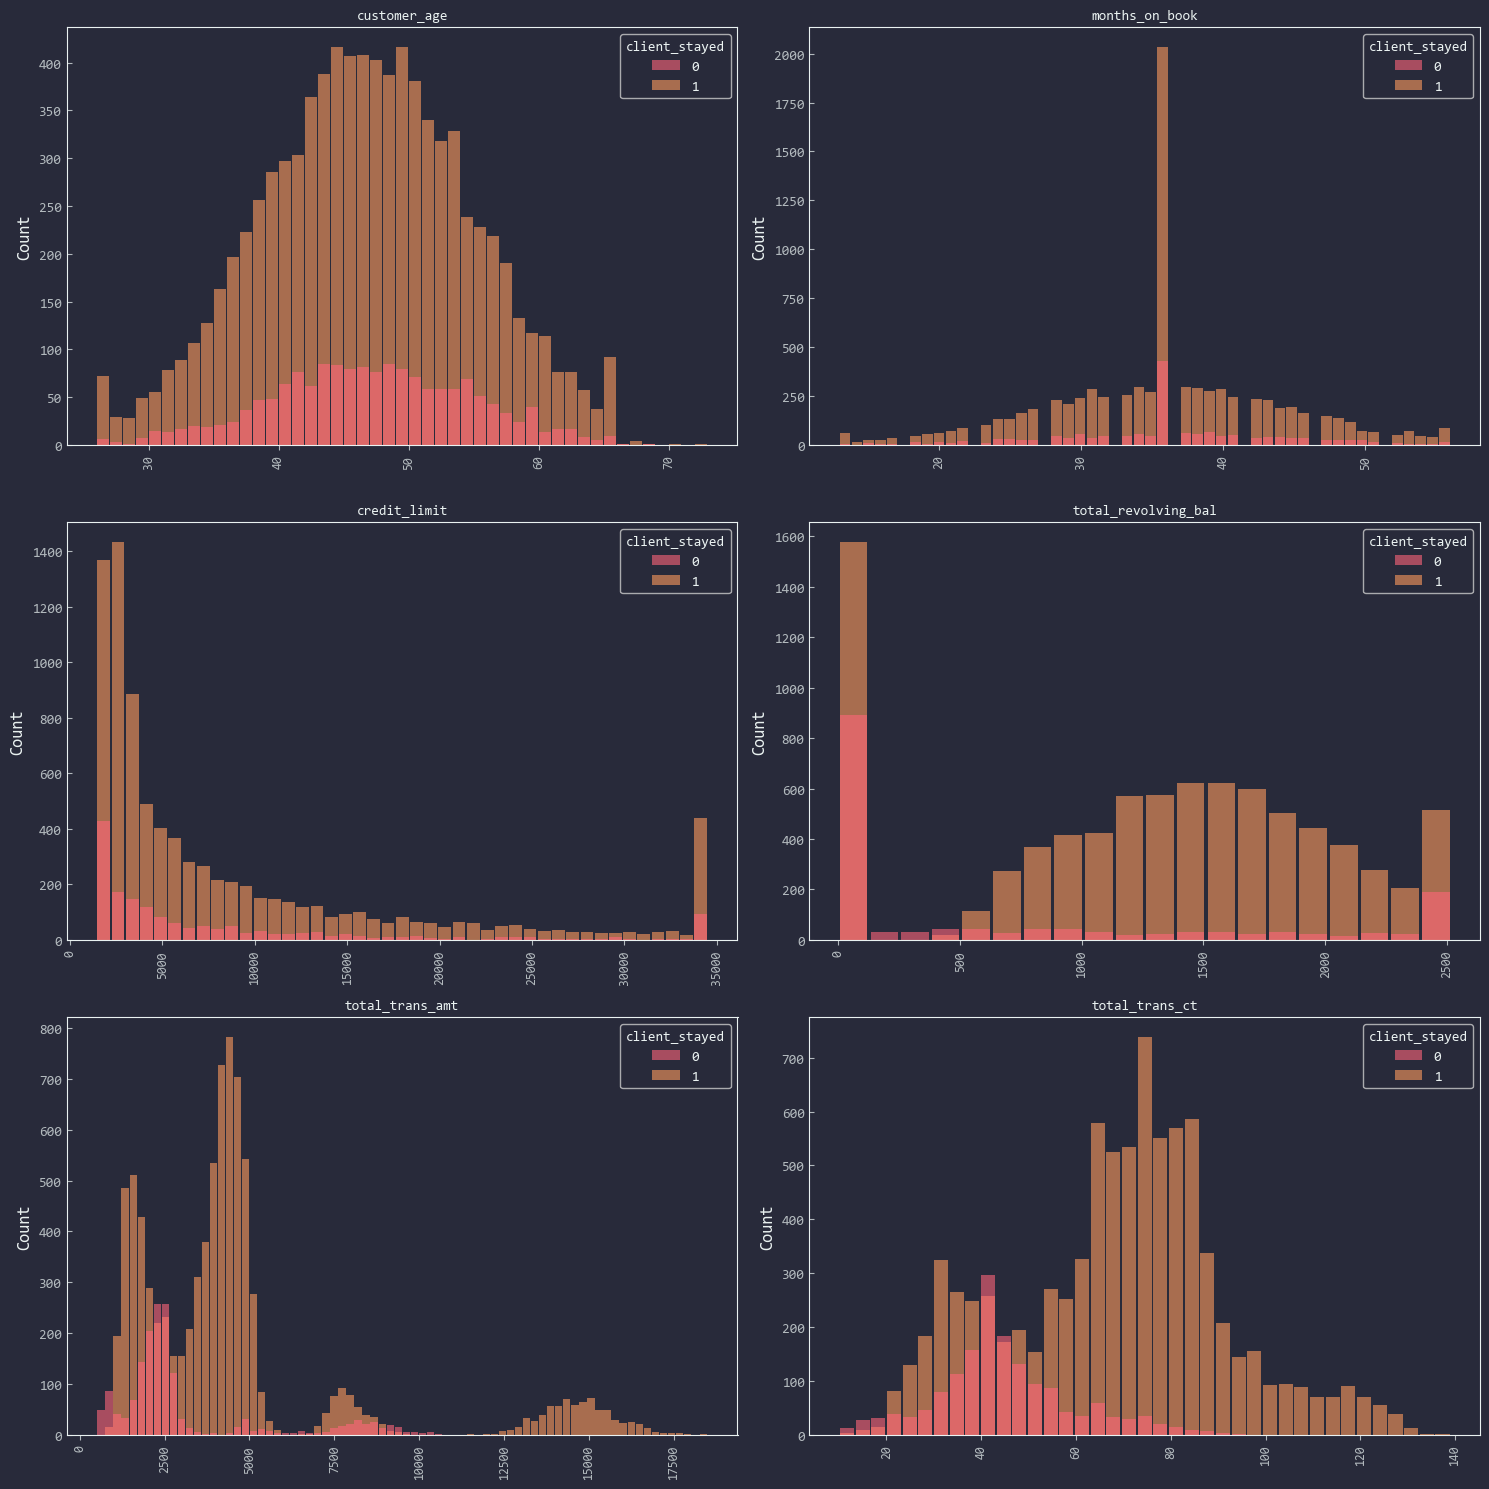

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, column in zip(axes.flat, granularidad_alta.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.9)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()


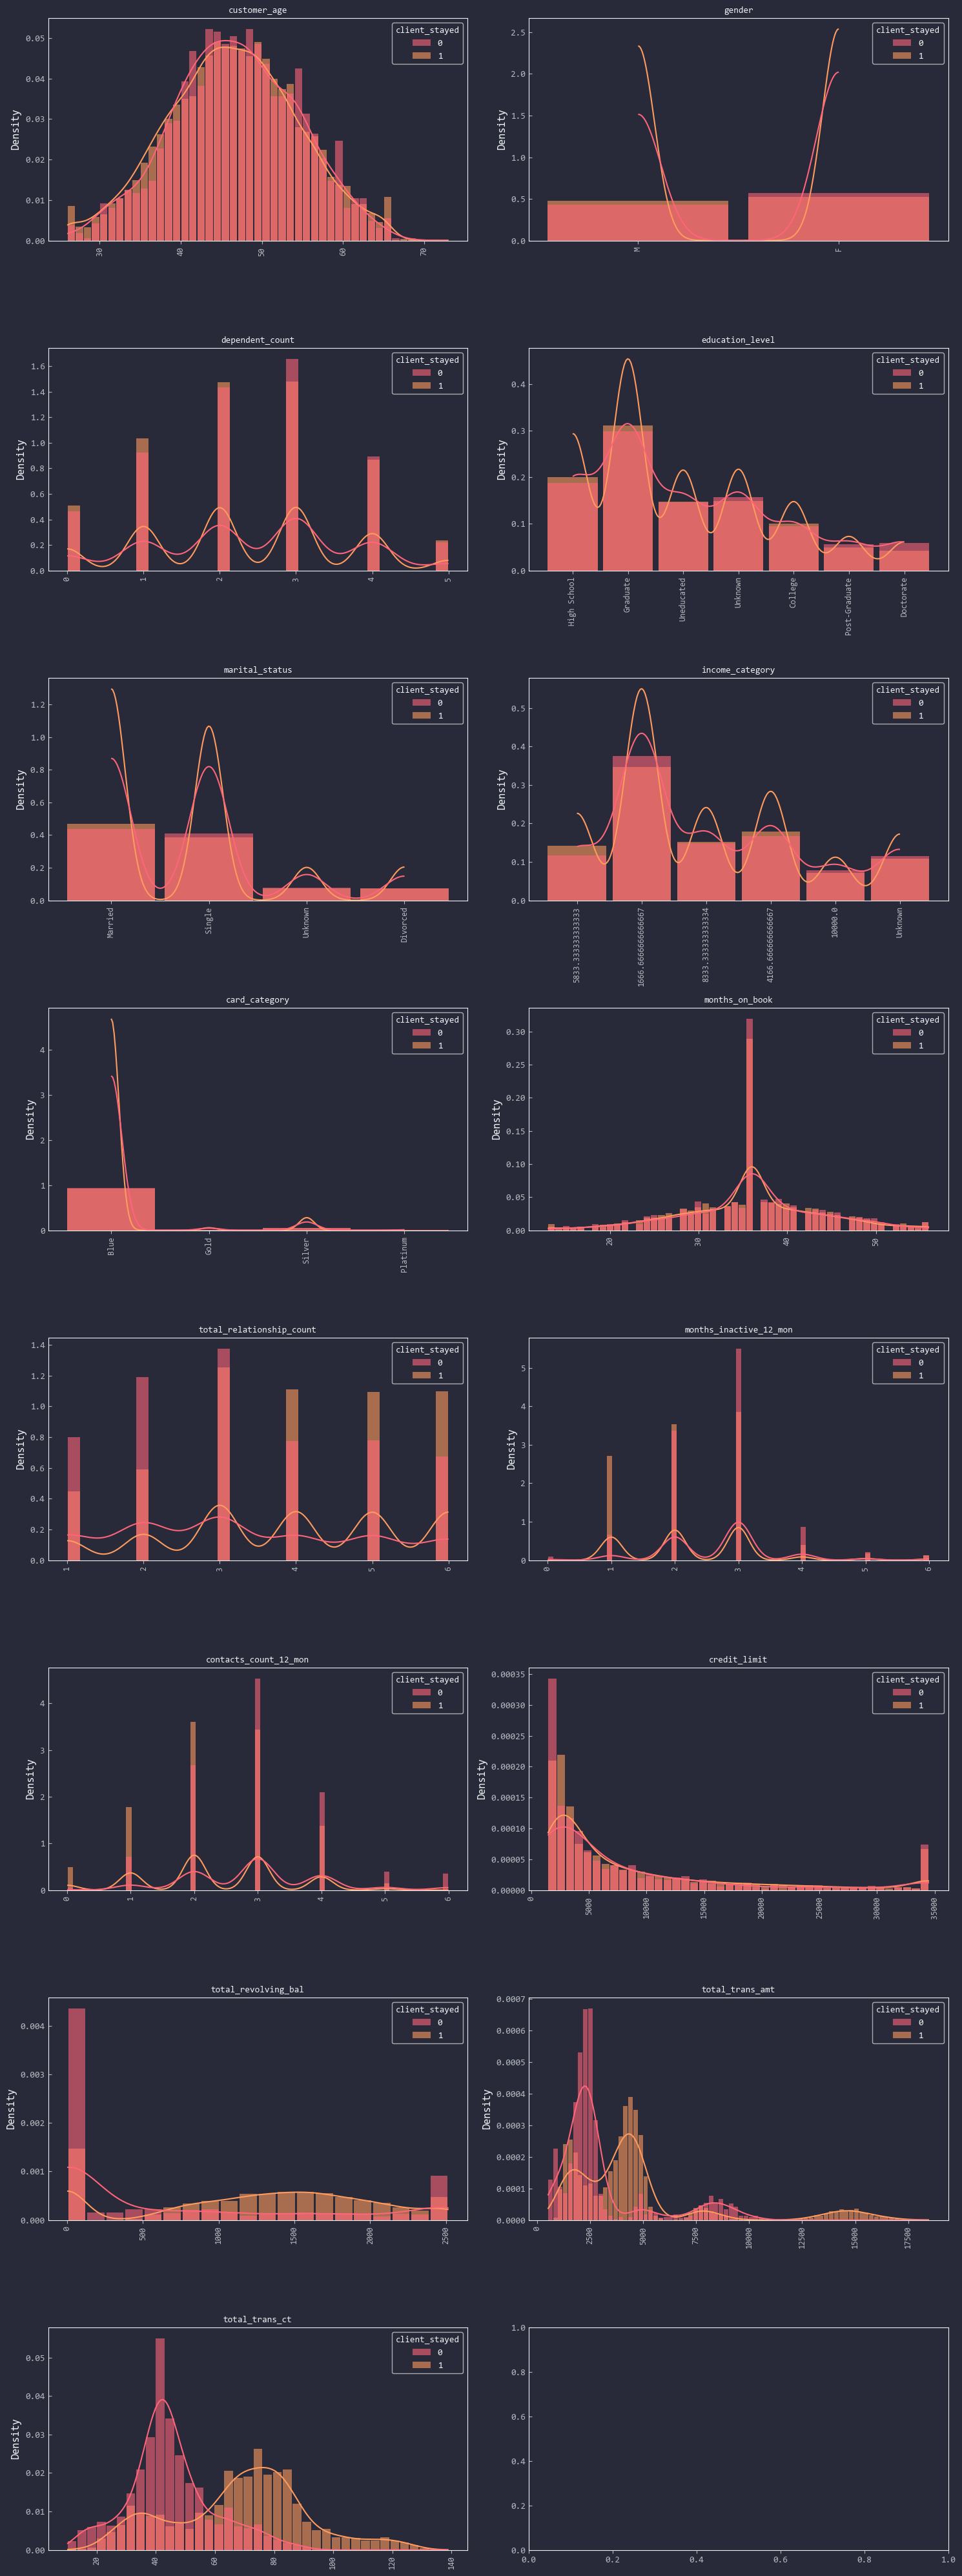

In [33]:
fig, axes = plt.subplots(8, 2, figsize=(15, 40))

for ax, column in zip(axes.flat, df.columns[1:]):
    sns.histplot(data=df, x=column, hue='client_stayed', ax=ax,
                 alpha=0.6, edgecolor='none', shrink=0.9,
                 kde=True, stat='density', common_norm=False)
    ax.tick_params(axis='x', labelrotation=90, labelsize=9)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()